In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [63]:
data=pd.read_csv('Add_sales_data_2018.csv') ## Reads the dataset to the python environment.


In [64]:
data.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [65]:
data.tail()


,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
200,2017-12-14,288.00,288.25,279.20,284.50,284.30,5374.105
201,2017-12-13,290.00,292.50,282.20,284.80,284.45,5439.655
202,2017-12-12,298.60,298.60,286.65,287.45,287.80,5545.013
203,2017-12-11,290.00,299.55,285.90,297.85,298.35,5565.444
204,2017-12-08,287.55,289.90,285.05,288.05,288.45,5421.842


In [66]:
data.shape

(205, 7)

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [68]:
data.isna().sum()  # Data is clean

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

data is about money spend for advertisements and the profit obtained.Here profit is the dependent variable and amount spend on advertisements are independent variables

In [69]:
data.drop(["Date"], axis = 1,inplace=True)

# check whether there is any relationship between the amount  spent for advertising through five different companies and profit  generated.

<AxesSubplot:>

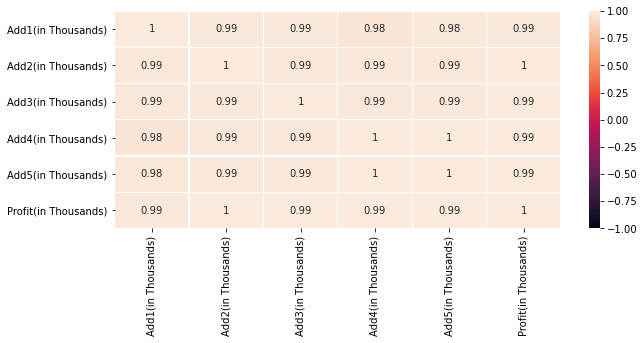

In [70]:
corrmatrix=data.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix,vmin=-1,vmax=1,annot=True,linewidth=0.2)

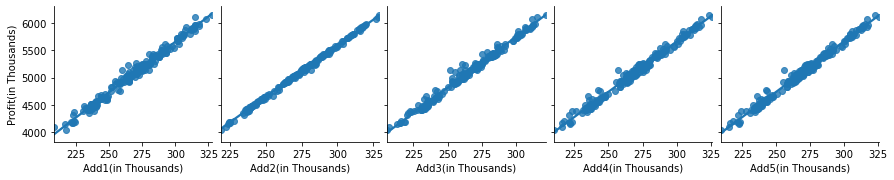

In [71]:


col=['Add1(in Thousands)','Add2(in Thousands)','Add3(in Thousands)','Add4(in Thousands)','Add5(in Thousands)']

sns.pairplot(data, x_vars=col, y_vars='Profit(in Thousands)', kind='reg')

From heatmap and pairplot its is evident that there exist a high postive correlation between the dependent and independent variables.

# Build a regression model to predict the profit from the given data and  comment your findings on it

profit=(m1*add1)+(m2*add2)+(m3*add3)+(m4*add4)+(m5*add5)+b 
Dependent variable-profit 
Independent varibles- add1,add2,add3,add4,add5 
intercept-b 
coefficients-m1,m2,m3,m4,m5

In [72]:
dep_var=['Add1(in Thousands)','Add2(in Thousands)','Add3(in Thousands)','Add4(in Thousands)','Add5(in Thousands)']
X=data[dep_var]
y=data['Profit(in Thousands)']

In [73]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.25)
# Spiliting data as test and train
#75% data will be for training and 25% data for testing

In [74]:
lr=linear_model.LinearRegression()  #creating object of LinearRegression

In [75]:
model=lr.fit(X_train,y_train)  #training and fitting LR object using training data

In [76]:
predictions=model.predict(X_test)

In [77]:
print(y_test)

15     4152.066
9      4446.441
100    5131.898
132    4907.560
68     5004.282
95     4623.793
159    5384.175
162    5328.025
147    5175.051
182    5956.323
191    5780.799
164    4997.719
65     5075.858
175    5784.540
73     4936.120
152    5065.652
18     4190.965
82     5034.726
86     5015.536
143    5134.657
60     5145.131
101    5421.940
98     4569.293
30     4598.292
25     4436.321
16     4175.677
168    5616.791
195    5667.250
97     4648.834
194    5717.838
67     5001.615
120    5182.368
154    5017.503
202    5545.013
79     5013.207
69     5030.451
145    5108.626
55     4760.877
45     4606.340
84     4925.861
146    5250.788
66     5038.222
111    5491.792
153    5019.997
96     4647.356
38     4486.380
24     4435.174
139    5300.437
112    5425.190
29     4482.183
19     4193.095
178    6062.457
Name: Profit(in Thousands), dtype: float64


In [78]:
print(predictions)  #ypred consist of the predicted profit corresponding to X_test

[4152.066 4446.441 5131.898 4907.56  5004.282 4623.793 5384.175 5328.025
 5175.051 5956.323 5780.799 4997.719 5075.858 5784.54  4936.12  5065.652
 4190.965 5034.726 5015.536 5134.657 5145.131 5421.94  4569.293 4598.292
 4436.321 4175.677 5616.791 5667.25  4648.834 5717.838 5001.615 5182.368
 5017.503 5545.013 5013.207 5030.451 5108.626 4760.877 4606.34  4925.861
 5250.788 5038.222 5491.792 5019.997 4647.356 4486.38  4435.174 5300.437
 5425.19  4482.183 4193.095 6062.457]


In [79]:
print('MSE is ',mean_squared_error(y_test,predictions))

MSE is  6.362927788869444e-25


 MSE is used to check how close estimates or forecasts are to actual values. Lower the MSE, the closer is forecast to actual. 

In [80]:
from sklearn.metrics import r2_score
r2_score(y_test,predictions)

1.0

R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression
R-squared = Explained variation / Total variation

R-squared is always between 0 and 100%:

0% indicates that the model explains none of the variability of the response data around its mean.

100% indicates that the model explains all the variability of the response data around its mean.

# Predict the profit generated by the company, if they wish to spend the  following amount for advertisement

Add1(in Thousands) 290
Add2(in Thousands) 312
Add3(in Thousands) 309
Add4(in Thousands) 298
Add5(in Thousands) 320


In [81]:
dep_var=['Add1(in Thousands)','Add2(in Thousands)','Add3(in Thousands)','Add4(in Thousands)','Add5(in Thousands)']
X=data[dep_var]
y=data['Profit(in Thousands)']

In [82]:
lm2=linear_model.LinearRegression()
lm2.fit(X, y)

LinearRegression()

In [83]:
print (lm2.intercept_)
print (lm2.coef_)

0.0
[ 1.   12.38  3.5   1.    0.9 ]


In [84]:
list(zip(dep_var, lm2.coef_))

[('Add1(in Thousands)', 0.9999999999999784),
 ('Add2(in Thousands)', 12.380000000000038),
 ('Add3(in Thousands)', 3.4999999999999867),
 ('Add4(in Thousands)', 1.0000000000000022),
 ('Add5(in Thousands)', 0.8999999999999934)]

In [85]:
lm2.predict([[290,312,309,298,320]])

array([5820.06])

Obtained the Predicted the profit generated by the company for spending the  following amount for advertisement

Add1(in Thousands) 290
Add2(in Thousands) 312
Add3(in Thousands) 309
Add4(in Thousands) 298
Add5(in Thousands) 320
  
as 5820.06